<a href="https://colab.research.google.com/github/DmitryKuptsov/-/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22homework_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
This homework consists of three parts, each of which is rated at 10 points:
* Numpy (10 points)
* Matplotlib (10 points)
* Linear Regression (10 points)

The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

**Deadline: FILL_THE_GAP**

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
# task 1 (1 point)

"""
description: finds the maximum element in the vector among the elements preceded by zero
input: np.array([0, 2, 0, 3])
output: 3
"""
def max_after_zero(x: np.array) -> int:
    x1 = x.copy()
    x1 = np.concatenate((np.array([1]), x1), axis=None)
    x = np.concatenate((x, np.array([1])))
    x = x[x1==0]
    x = x[:len(x)-1]
    return np.max(x)
    assert False, 'not implemented'

In [ ]:
x = np.array([0, 1, 2, 0, 6, 0, 10, 0])
assert max_after_zero(x) == 10
print("OK")

OK


In [ ]:
# task 2 (1 point)

"""
description: given an image (height, width, numChannels) and weights (numChannels)
Sums the image channels with the specified weights and return the result as
a size matrix (height, width).

Give an example of how the function works – convert a color image to shades of 
gray using np.array coefficients([0.299, 0.587, 0.114]). 
Take a cool picture for the joy of the assistant and draw it 
before and after the transformation.
"""
def grayscale(img: np.array, weights: np.array) -> np.array:
    return img@weights.T
    assert False, 'not implemented'

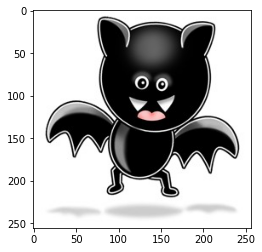

In [ ]:
from PIL import Image
im = Image.open('lolliboo-39731.jpg', 'r')
width, height = im.size
pixel_values = list(im.getdata())
pixel_values1 = np.array(pixel_values).reshape((width, height, 3))
plt.imshow(pixel_values1)

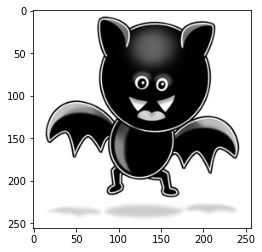

In [ ]:
plt.imshow(grayscale(pixel_values1, np.array([0.299, 0.587, 0.114])), cmap='gray')

In [ ]:
img = np.arange(1*2*3).reshape(1, 2, 3)
weights = np.array([0.299, 0.587, 0.114])
res = np.array([[ 0.815,  3.815]])
assert np.allclose(grayscale(img, weights), res)
print("OK")

OK


In [ ]:
# task 3 (2 points)

"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array) -> np.array:
    x = block.copy()
    block = np.concatenate((block, x), axis=1)
    x1 = block.copy()
    return np.concatenate((block, x1), axis=0)
    assert False, 'not implemented'

In [ ]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


In [ ]:
# task 4 (2 points)

"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array) -> int:
    n = len(matrix)
    x = np.concatenate((matrix), axis=None)
    indexes = np.arange(len(x))
    diag = x[indexes%(n+1)==0]
    nonzerodiag = diag[diag!=0]
    return np.prod(nonzerodiag)
    assert False, 'not implemented'

In [ ]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

OK


In [ ]:
# task 5 (2 points)

"""
description: this class implements StandardScaler from the sklearn library
As input, the fit method accepts a matrix where the signs are arranged in
columns, the fit method must remember mu and sigma for each of the signs,
and the transform must normalize the matrix with the pre-calculated mu and sigma.
"""
class StandardScaler:
    def fit(self, X: np.array):
        self.mu = np.mean(X, axis=0)
        self.sigma = np.std(X, axis=0)
        #assert False, 'not implemented'
    
    def transform(self, X: np.array) -> np.array:
        mu1 = np.repeat(self.mu.T, len(X), axis=0)
        a = len(X)
        mu1 = mu1.reshape(a, a).T
        sigma1 = np.repeat(self.sigma.T, len(X), axis=0)
        a = len(X)
        sigma1 = sigma1.reshape(a, a).T
        b = X - mu1
        c = b / sigma1
        return c
        assert False, 'not implemented'

In [ ]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


In [ ]:
# task 6 (2 points)

"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array) -> np.array:
    return np.polyint(coefs,1, 42)
    assert False, 'not implemented'

In [ ]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [ ]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

### Task 1 (5 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose mu and sigma on your choice). Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): draw a circle centered in mu with a radius such that 0.99 of all points fall there, also draw a circle with a radius of 3 sigma. Draw a point mu in a separate color.

Use subplot to draw histograms with 10 buckets for each dimension and draw a density graph along the histogram.

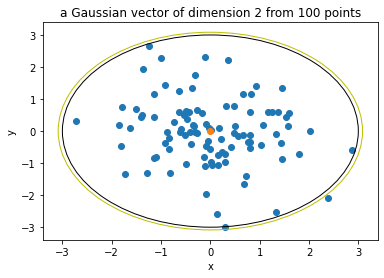

In [ ]:
# Your code goes here
s = np.random.normal(0, 1, 100)
s1 = np.random.normal(0, 1, 100)
s2 = np.max(np.sqrt(s**2+s1**2))
s3 = np.sort(np.sqrt(s**2+s1**2))[-2]
ss = (s2+s3)/2
s = s.reshape(-1, 1)
s1 = s1.reshape(-1, 1)
s2 = np.concatenate((s, s1), axis=1)
#s2 = s2.T

s2
fig, ax = plt.subplots()
ax.scatter(s, s1)
ax.scatter(0, 0)
ax.add_patch(plt.Circle((0, 0), 3, fill=False))
ax.add_patch(plt.Circle((0, 0), ss, fill=False, color='y'))
ax.plot()
plt.xlabel('x')
plt.ylabel('y')
plt.title('a Gaussian vector of dimension 2 from 100 points')
plt.show()

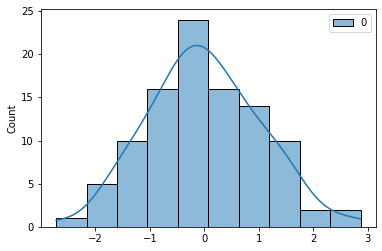

In [ ]:
import seaborn as sns
sns.histplot(s, bins=10, kde=True)
None

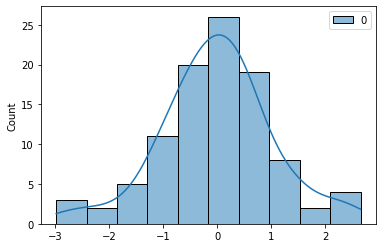

In [ ]:
sns.histplot(s1, bins=10, kde=True)
None

### Task 2 (5 points)

Upload the dataset from the last seminar [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера). Build a **heatmap** with correlations between features, rows and columns should be signed with feature names. It is important to use matplotlib. The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use plt.xticks, plt.yticks, plt.imshow, plt.colorbar

Also build the same heatmap using seaborn.heatmap

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
data = iris['data']
name = iris['feature_names']
#print(data[''])
np.corrcoef(data['sepal length (cm)'], data['sepal width (cm)'])
arr = []
for i in name:
    for j in name:
        arr.append(np.corrcoef(data[i], data[j])[1][0])
arr = np.array(arr)
arr = arr.reshape(4, 4)

# Your code goes here

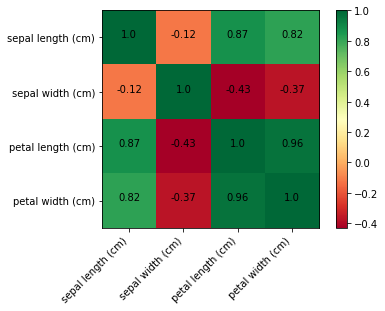

In [ ]:
fig, ax = plt.subplots()
im = ax.imshow(arr, cmap='RdYlGn')
plt.xticks(np.arange(4), name)
plt.yticks(np.arange(4), name)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
for i in range(len(name)):
    for j in range(len(name)):
        text = ax.text(j, i, round(arr[i, j], 2),
                       ha="center")
ax.figure.colorbar(im, ax=ax)
plt.show()

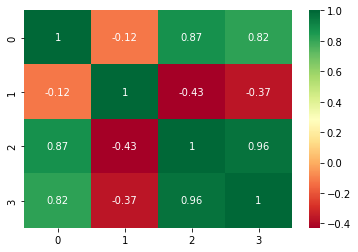

In [ ]:
sns.heatmap(arr, cmap='RdYlGn', annot=True)
None

## Part 3. Linear Regression
In this part, you need to implement a class with an analytical solution of linear regression and use all the skills you have acquired.

You are allowed to use any libraries: sklearn, numpy, matplotlib, scipy, etc.

Conclusions are needed for each step, only the code will be rated at 0 points

Load a dataset using np.loadtxt and split it into train and test

In [ ]:
 !wget https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv

--2022-10-10 17:56:01--  https://www.dropbox.com/s/kg9px9v3xfysak9/tutorial_dataset.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/kg9px9v3xfysak9/tutorial_dataset.csv [following]
--2022-10-10 17:56:02--  https://www.dropbox.com/s/raw/kg9px9v3xfysak9/tutorial_dataset.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb130f8e6cf66e7c3b5df498f48.dl.dropboxusercontent.com/cd/0/inline/BukHeoTHdsAJl72g_UqMJWi41GS04K9b5Hd5M0kml79SHc6IApETgO9FcE81nJksoLxin4Fa7Fe_B9wNMXMF3PeifpowS2pH-v69ThFU6cK497AzA7KuXZ0Ztjlbr6PNqA_v_8E_w76pSCkFAkOsu5pS5im5GpAG_EZhhvL3fySq0w/file# [following]
--2022-10-10 17:56:02--  https://ucb130f8e6cf66e7c3b5df498f48.dl.dropboxusercontent.com/cd/0/inline/BukHeoTHdsAJl72g_UqMJWi41GS04K9b5Hd5M0kml79SHc6IApETgO9F

In [ ]:
# Your code goes here
# Загрузим датасет
a = np.loadtxt('tutorial_dataset.csv', dtype=str)
# Преобразуем датасет так, чтобы с ним было удобнее работать
arr2 = []
b = []
for i in a[1:]:
    b = (i.split(','))
    for j in range(len(b)):
      b[j] = float(b[j])
    arr2.append(b)
    b = []
arr2 = np.array(arr2)
# Выполним разделение на train и test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(arr2[:, 1:], arr2[:, 0])
None

Plot the dependence of the target on the features and distributions of features, correlations and and everything that you think is important **(2 points)**

In [ ]:
# Your code goes here
# Найдем матрицу корреляций
name1 = a[0].split(',')
arr1 = []
X = arr2[:, 1:]
for i in range(len(name1)-1):
    for j in range(len(name1)-1):
        arr1.append(np.corrcoef(X[:, i], X[:, j])[1][0])
arr1 = np.array(arr1)
arr1 = arr1.reshape(5, 5)
None

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


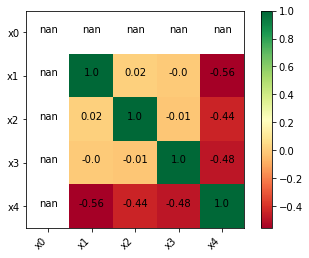

In [ ]:
# Нарисуем матрицу корреляций
fig, ax = plt.subplots()
im = ax.imshow(arr1, cmap='RdYlGn')
plt.xticks(np.arange(5), name1[1:])
plt.yticks(np.arange(5), name1[1:])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
for i in range(len(name1[1:])):
    for j in range(len(name1[1:])):
        text = ax.text(j, i, round(arr1[i, j], 2),
                       ha="center")
ax.figure.colorbar(im, ax=ax)
plt.show()

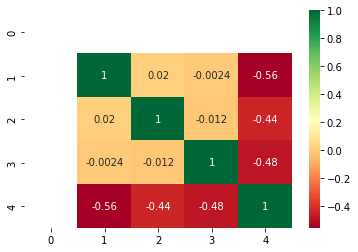

In [ ]:
# Нарисуем матрицу корелляций еще раз)
sns.heatmap(arr1, annot=True, cmap='RdYlGn')
None

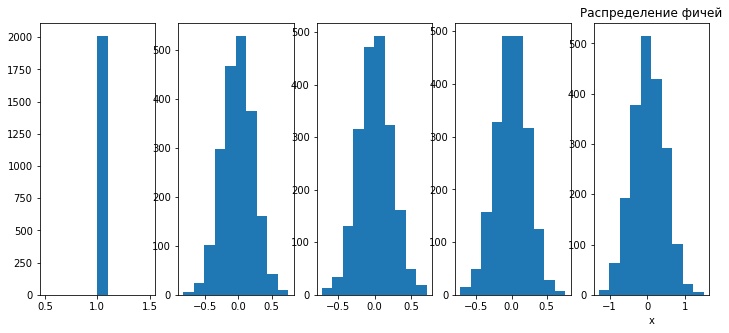

In [ ]:
# Нарисуем распределение фичей, фичи идут по порядку от x_0 до x_4
fig, axs = plt.subplots(1, 5)
fig.set_figheight(5)
fig.set_figwidth(12)
for i in range(len(name1)-1):
    axs[i].hist(X[:, i])
plt.title('Распределение фичей')
plt.xlabel('x')
plt.show()

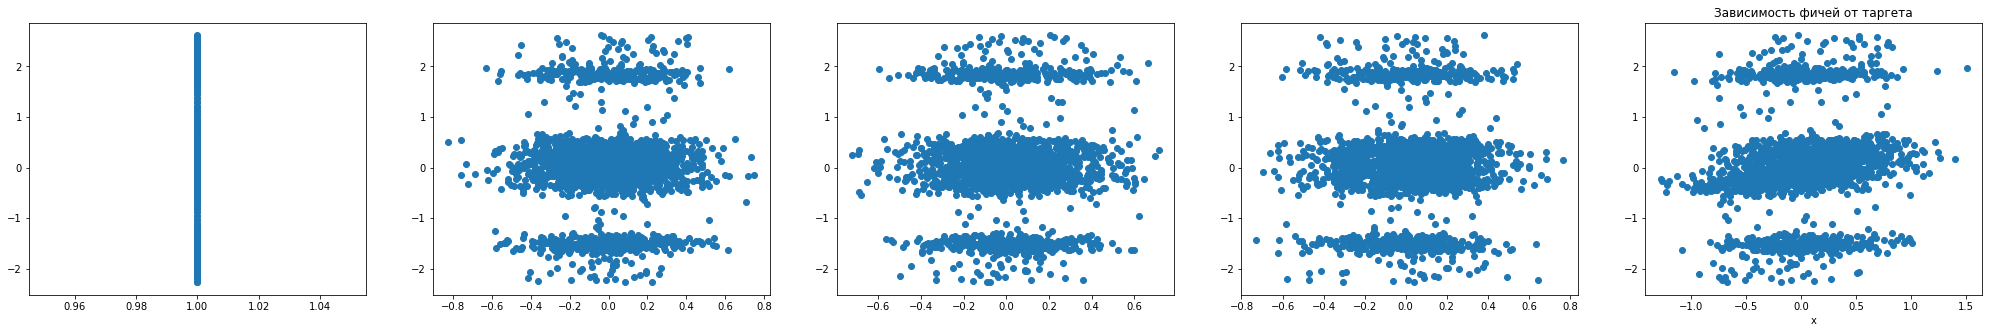

In [ ]:
# Нарисуем зависимость фичей от таргета, фичи идут по порядку от x_0 до x_4, по оси y расположен таргет
# Заметим, что только у последней фичи прослеживается явная зависимость с таргетом на этом рисунке
fig, axs = plt.subplots(1, 5)
fig.set_figheight(5)
fig.set_figwidth(35)
for i in range(len(name1)-1):
    axs[i].scatter(X[:, i], arr2[:, 0])
plt.xlabel('x')
plt.title('Зависимость фичей от таргета')
plt.show()

Implement a linear regression class, normalize features if needed and fit model **(2 points)**

In [ ]:
# Имплементируем линейную регрессию
class MyLinearRegression:
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.w = np.linalg.inv(self.X_train.T@self.X_train)@(self.X_train.T)@(y_train)
        print(self.w)
        #assert False, 'not implemented'
    
    def predict(self, X_test):
        y_pred = (self.w@X_test.T)
        return y_pred
        assert False, 'not implemented'

In [ ]:
# Отнормируем признаки, чтобы улучшить качество модели, обучим модель и сделаем предсказания
scaler = sklearn.preprocessing.StandardScaler()
X_train_ss = scaler.fit_transform(X_train[:, 1:])
X_train_ss = np.concatenate(([X_train[:, 0]], X_train_ss.T), axis=0)
lin = MyLinearRegression()
lin.fit(X_train_ss.T, y_train)
lin.predict(X_test)
None

[0.03908982 0.26347644 0.22386506 0.25201786 0.47374334]


In [ ]:
# Посчитаем метрики, MAE лучше работает с выбросами
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
y_test = np.array(y_test)
y_pred = np.array(lin.predict(X_test))
print('MSE:',mse(y_test, y_pred))
print('MAE:',mae(y_test, y_pred))

MSE: 1.0847012274095928
MAE: 0.7325253626611541


Try to come up with a way to understand which feature contributes more to your model **(3 points)**

In [ ]:
# Your code goes here
# Чтобы понять, какая фича является наиболее важной, можно по очереди выкидывать фичи и смотреть, где mse увеличится сильнее.
msearr = []
for i in range(1, 5):
    X_train_ss_1 = np.concatenate((X_train_ss[:i],X_train_ss[i+1:]))
    lin.fit(X_train_ss_1.T, y_train)
    y_pred2 = np.array(lin.predict(np.concatenate((X_test.T[:i],X_test.T[i+1:])).T))
    msearr.append(mse(y_test, y_pred2))
msearr = np.array(msearr)
print(msearr)
print('Наиболее важной при такой системе оценки является фича номер ', np.argmax(msearr)+1, '. Это подтверждается и тем, что она наиболее скореллирована с y, это можно увидеть на графиках фич и таргета.')

[0.03908982 0.11332964 0.12907857 0.22025826]
[0.03908982 0.14483379 0.14682396 0.26032969]
[0.03908982 0.12510068 0.11355363 0.23120489]
[ 0.03908982 -0.00346658  0.01447841  0.02509543]
[1.09817357 1.09399956 1.09177115 1.11074637]
Наиболее важной при такой системе оценки является фича номер  4 . Это подтверждается и тем, что она наиболее скореллирована с y, это можно увидеть на графиках фич и таргета.


Plot the dependence on the size of the training sample and the mse score **(1 point)**

In [ ]:
# Your code goes here
# Подготовим данные. Поскольку не предпологается выявить что-то новое, а скорее подтвердить
# довольно очевидную догадку, каждый раз беруться первые n элементов. Если бы целью было
# найти некоторую неочевидную закономерность, я бы брал batch случайно выбранных выборок заданного размера,
# в этом случае результат получился бы менее зависящим от первых элементов, но в данном случае это
# не играет существенной роли
mse_sample = []
for i in range(1, 503):
    lin.fit(X_train[:i+1], y_train[:i+1])
    y_preds_4 = np.array(lin.predict(X_test))
    mse_sample.append([i, mse(y_test, y_preds_4)])

[  3.20611125   8.04758999  -2.28448265 -15.84580118  16.81504   ]
[ 2.54269897 13.23218201 -0.47395111 11.09968592  0.04065385]
[ -95.45067699 -368.31447021  170.32596985  317.89302079   -6.72657895]
[ -1.17335819 -26.83391081 -13.02986537 -10.64975088   2.47940602]
[ -0.96747879 -23.90320079 -11.76002614  -6.98741676   3.48199015]
[ -0.69396222 -22.01441386 -11.04115611  -4.0279063    2.96385083]
[ 0.14950308 -0.076652    0.9543714  -0.87923607  2.03245019]
[0.06993137 0.55783896 1.35119513 0.74519839 2.83443547]
[-0.02724992  0.77505922  2.33030597  2.50945327  3.89882538]
[-0.01743911  0.94510308  2.56823021  2.79534253  4.06378464]
[-0.14180864  1.85207483  2.95050185  2.88374359  3.6501486 ]
[-0.13517365  1.83789302  2.87325324  2.76787265  3.59617427]
[-0.19637501  1.82706863  2.25322898  1.87804527  2.52591931]
[-0.17785469  1.51612743  2.05679892  1.86405396  2.42938824]
[-0.03188727  0.5661149   0.29334987 -0.34891258  0.66921671]
[0.01452016 0.9807534  0.78539587 0.33970729 

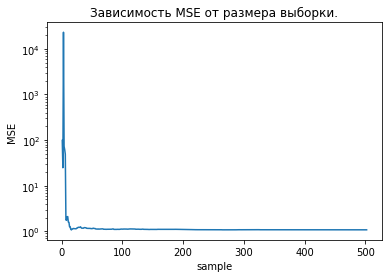

In [ ]:
# Сделаем рисунок, шкала по y является логарифмической
mse_sample1 = np.array(mse_sample).T
plt.plot(mse_sample1[0], mse_sample1[1])
plt.yscale('log')
plt.xlabel('sample')
plt.ylabel('MSE')
plt.title('Зависимость MSE от размера выборки.')
plt.show()

Fit LinearRegression model from sklearn. Try to get the minimum MSE score as possible. Compare results with your model **(1 point)**

In [ ]:
# Your code goes here
# Обучим линейную регрессию из sklearn, сравним результаты
from sklearn.linear_model import LinearRegression
linskl = LinearRegression()
linskl.fit(X_train_ss.T, y_train)
y_pred_skl = linskl.predict(X_test)
print('MSE: ',mse(y_test, y_pred_skl))
print('MAE: ',mae(y_test, y_pred_skl))
#Результаты полностью совпадают с классом, написаным самостоятельно

MSE:  1.0847012274095928
MAE:  0.7325253626611541


Describe the challenges you had to face :) **(1 point)**

In [ ]:
# Write here your thoughts
# Одним из самых сложных моментов было следить за тем, чтобы у X была правильная
# размерность. Также было непросто предобрабатывать данные, так как нет конкретных
# фреймворков. 
# Неочевидно было также, как проверить, какая фича самая важная, поэтому приходилось
#делать некоторые предположения.